In [1]:
# !pip install -r requirements.txt

In [2]:
# !pip install nbconvert

## 1. Import required libraries

In [3]:
import numpy as np #linear algebra calcs
import matplotlib.pyplot as plt #plotting the image
%matplotlib inline

import tensorflow as tf # for ANN
from tensorflow import keras
from keras.layers import Dense

from sklearn.metrics import accuracy_score # evaluation metrics 
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

## 2. Load the dataset
#### Note: Keras has MNIST dataset inbuilt.

In [4]:
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

## 3. Data Preprocessing

In [5]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
print(f'Training dataset has {X_train.shape[0]} images, of each having dimensions {X_train.shape[1], X_train.shape[2]}.')
print(f'Test dataset has {X_test.shape[0]} images, of each having dimensions {X_test.shape[1], X_test.shape[2]}.')

Training dataset has 60000 images, of each having dimensions (28, 28).
Test dataset has 10000 images, of each having dimensions (28, 28).


In [7]:
print(f'First image looks like: \n {X_train[0]} \n\n and it actually is {y_train[0]}.')

First image looks like: 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 

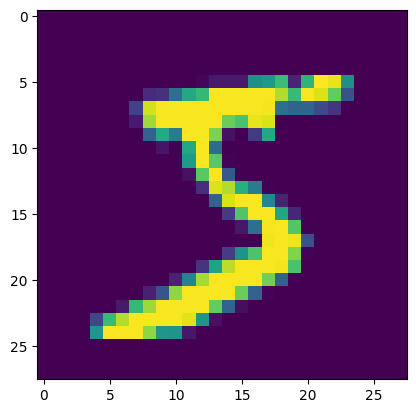

In [8]:
plt.imshow(X_train[0])

### Scaling the data from 0 to 1 using max absolute scaler i.e. simply divide by 255

In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
#scaled data looks like
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### we need to reshape our 2D array into 1D array of 784 columns, so reshaping it using flatten

In [11]:
X_train_flattened = X_train.reshape(len(X_train) , 784)
X_test_flattened = X_test.reshape(len(X_test) , 784)

In [12]:
X_train_flattened.shape

(60000, 784)

In [13]:
X_test_flattened.shape

(10000, 784)

### Logistic regression multiclass classification

In [14]:
lr_clf = LogisticRegression() 

In [15]:
lr_clf.fit(X_train_flattened, y_train)

LogisticRegression()

In [16]:
lr_pred = lr_clf.predict(X_test_flattened)

In [17]:
accuracy_score(y_test, lr_pred)

0.9258

In [18]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.91      0.91      1010
           4       0.94      0.93      0.93       982
           5       0.91      0.88      0.89       892
           6       0.94      0.95      0.94       958
           7       0.94      0.92      0.93      1028
           8       0.87      0.88      0.88       974
           9       0.91      0.92      0.92      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



### Random Forest Classifier

In [19]:
rf_clf = RandomForestClassifier(random_state=42)

In [20]:
rf_clf.fit(X_train_flattened, y_train)

RandomForestClassifier(random_state=42)

In [21]:
rf_pred = rf_clf.predict(X_test_flattened)

In [22]:
accuracy_score(y_test, rf_pred)

0.9704

In [23]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



## 4. ANN Model Building
784 -> 128 -> 10 output neurons, which gives the probability of the image being a number X

In [24]:
model = keras.Sequential()

model.add(Dense(128, activation = 'relu',input_shape = (784,)))
# model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


784*128 + 128 = 100480    

128*10 + 10 = 1290

In [26]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [27]:
model.fit(X_train_flattened,y_train,epochs = 25, validation_split = 0.20)

Epoch 1/25
1500/1500 [==============================] - 7s 3ms/step - loss: 0.2888 - accuracy: 0.9175 - val_loss: 0.1535 - val_accuracy: 0.9586
Epoch 2/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1296 - accuracy: 0.9616 - val_loss: 0.1126 - val_accuracy: 0.9682
Epoch 3/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0891 - accuracy: 0.9735 - val_loss: 0.0970 - val_accuracy: 0.9716
Epoch 4/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0657 - accuracy: 0.9804 - val_loss: 0.0885 - val_accuracy: 0.9728
Epoch 5/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0522 - accuracy: 0.9845 - val_loss: 0.0869 - val_accuracy: 0.9736
Epoch 6/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0397 - accuracy: 0.9883 - val_loss: 0.0851 - val_accuracy: 0.9746
Epoch 7/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0306 - accuracy: 0.9907 - val_loss: 0.1038 - val_accuracy:

In [28]:
y_probability = model.predict(X_test_flattened)

313/313 [==============================] - 1s 2ms/step


In [29]:
y_probability

array([[7.7482041e-14, 7.8093223e-20, 3.3488665e-15, ..., 1.0000000e+00,
        4.4788823e-13, 4.4777018e-10],
       [3.0468694e-19, 8.0376783e-16, 1.0000000e+00, ..., 0.0000000e+00,
        4.2061424e-12, 1.7094860e-32],
       [9.6975761e-12, 9.9999714e-01, 3.1162365e-08, ..., 2.0456669e-06,
        3.7140097e-07, 4.3137265e-12],
       ...,
       [8.2791838e-27, 6.6478531e-24, 4.1958322e-26, ..., 3.5447656e-12,
        1.3073529e-13, 2.4508946e-09],
       [1.2974683e-21, 1.0793242e-24, 3.1892352e-25, ..., 6.4095618e-17,
        7.4859554e-12, 2.6987322e-16],
       [4.3725802e-15, 8.2528937e-25, 7.6330185e-20, ..., 4.7501449e-28,
        3.9317894e-23, 6.9672803e-19]], dtype=float32)


y_probability contains the probabilities of each image being 0,1,2,3,4,5,6,7,8,9. Whichever has max probability is the predicted number.

**So, get the maximum index using argmax.**


In [30]:
y_pred = y_probability.argmax(axis = 1)

In [31]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

**get the accuracy of prediction**

In [32]:
accuracy_score(y_test, y_pred)

0.9793